## Simple Linear Regression_Model

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import the dataset

In [2]:
df = pd.read_csv("Cars.csv")
X = df.iloc[:, 3:-1].values
y = df.iloc[:,-1].values
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


### Check the rows and columns of the dataset by using "df.shape" method

In [3]:
df.shape

(36, 5)

In [4]:
df.columns.values

array(['Car', 'Model', 'Volume', 'Weight', 'CO2'], dtype=object)

In [5]:
df.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35], dtype=int64)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002813B98CF48>,
      dtype=object)

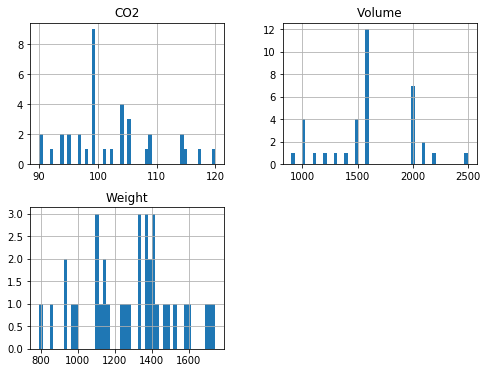

In [6]:
df.hist(bins = 50, figsize=(8, 6))

In [7]:
values_count = df["Weight"].value_counts()
values_count[:10]

1365    3
1415    2
1112    2
929     2
1150    1
1746    1
1405    1
1605    1
865     1
1160    1
Name: Weight, dtype: int64

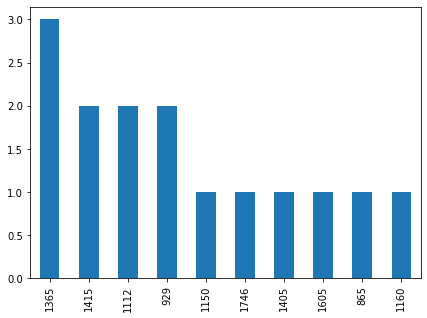

In [8]:
values_count[:10].plot(kind = "bar", figsize=(7, 5))

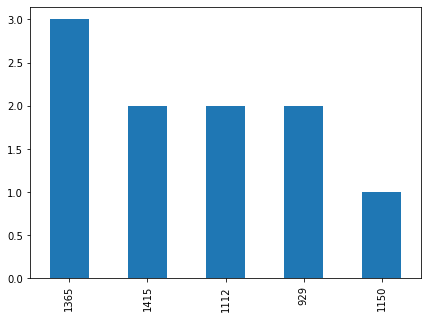

In [9]:
values_count[:5].plot(kind = "bar", figsize=(7,5))

### Check the featurs and the target

In [10]:
print(X)

[[ 790]
 [1160]
 [ 929]
 [ 865]
 [1140]
 [ 929]
 [1109]
 [1365]
 [1112]
 [1150]
 [ 980]
 [ 990]
 [1112]
 [1252]
 [1326]
 [1330]
 [1365]
 [1280]
 [1119]
 [1328]
 [1584]
 [1428]
 [1365]
 [1415]
 [1415]
 [1465]
 [1490]
 [1725]
 [1523]
 [1705]
 [1605]
 [1746]
 [1235]
 [1390]
 [1405]
 [1395]]


In [11]:
print(y)

[ 99  95  95  90 105 105  90  92  98  99  99 101  99  94  97  97  99 104
 104 105  94  99  99  99  99 102 104 114 109 114 115 117 104 108 109 120]


### Handling Missing Data

In [12]:
missing_data = df.isnull()
missing_data

,Car,Model,Volume,Weight,CO2
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


### Check missing_data point per column

In [13]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Car
False    36
Name: Car, dtype: int64

Model
False    36
Name: Model, dtype: int64

Volume
False    36
Name: Volume, dtype: int64

Weight
False    36
Name: Weight, dtype: int64

CO2
False    36
Name: CO2, dtype: int64



### Baisc insight of the dataset

#### info

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


### Dscriptive Statistic

In [15]:
df.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [16]:
df.describe(include = "all")

,Car,Model,Volume,Weight,CO2
count,36,36,36.000000,36.000000,36.000000
unique,17,35,NaN,NaN,NaN
top,Mercedes,Fiesta,NaN,NaN,NaN
freq,5,2,NaN,NaN,NaN
mean,NaN,NaN,1611.111111,1292.277778,102.027778
std,NaN,NaN,388.975047,242.123889,7.454571
min,NaN,NaN,900.000000,790.000000,90.000000
25%,NaN,NaN,1475.000000,1117.250000,97.750000
50%,NaN,NaN,1600.000000,1329.000000,99.000000
75%,NaN,NaN,2000.000000,1418.250000,105.000000


In [17]:
df.describe(include = "all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Car,36,17,Mercedes,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,36,35,Fiesta,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Volume,36,NaN,NaN,NaN,1611.11,388.975,900,1475,1600,2000,2500
Weight,36,NaN,NaN,NaN,1292.28,242.124,790,1117.25,1329,1418.25,1746
CO2,36,NaN,NaN,NaN,102.028,7.45457,90,97.75,99,105,120


### Corr

In [18]:
df[["Weight", "CO2"]].corr()

,Weight,CO2
Weight,1.00000,0.55215
CO2,0.55215,1.00000


### dtypes

In [19]:
df.dtypes

Car       object
Model     object
Volume     int64
Weight     int64
CO2        int64
dtype: object

### Categorical Variable

In [20]:
import seaborn as sns
%matplotlib inline

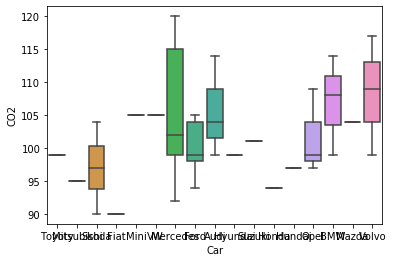

In [21]:
sns.boxplot(x = "Car", y = "CO2", data = df)

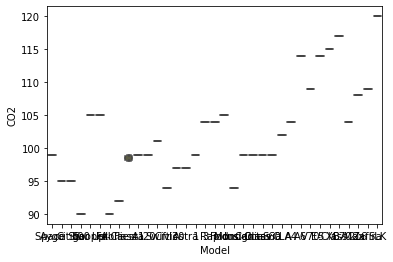

In [22]:
sns.boxplot(x = "Model", y = "CO2", data = df)

### Split the dataset into Training set and Test set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Train Linear Regression Model on the Training set

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print(X_train)

[[ 990]
 [1705]
 [1725]
 [1395]
 [1390]
 [1523]
 [1235]
 [1112]
 [1252]
 [ 929]
 [1280]
 [1326]
 [1365]
 [1490]
 [1160]
 [1112]
 [1465]
 [1415]
 [1109]
 [1415]
 [1140]
 [1119]
 [1428]
 [1328]
 [1150]
 [1405]
 [ 865]
 [ 790]]


In [26]:
print(X_test)

[[1746]
 [1584]
 [1365]
 [1605]
 [1365]
 [1330]
 [ 980]
 [ 929]]


In [27]:
print(y_train)

[101 114 114 120 108 109 104  98  94 105 104  97  92 104  95  99 102  99
  90  99 105 104  99 105  99 109  90  99]


In [28]:
print(y_test)

[117  94  99 115  99  97  99  95]


### predict the test result

In [29]:
y_pred = regressor.predict(X_test)
y_pred

array([109.97905224, 107.27603936, 103.62196639, 107.62642992,
       103.62196639, 103.03798212,  97.19813947,  96.34719097])

### What is the value of the intercept(a)

In [30]:
regressor.intercept_

80.84658004347031

### What is the value of the Slope (b)

In [31]:
regressor.coef_

array([0.01668526])

### Visualsing the Training set

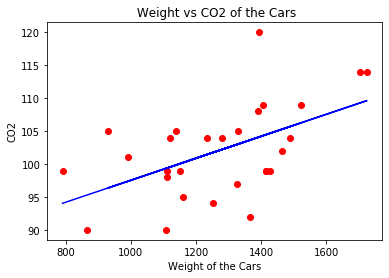

In [32]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regressor.predict(X_train), color = "blue")
plt.title(" Weight vs CO2 of the Cars")
plt.xlabel("Weight of the Cars")
plt.ylabel("CO2")
plt.show()

### Visualising the test set

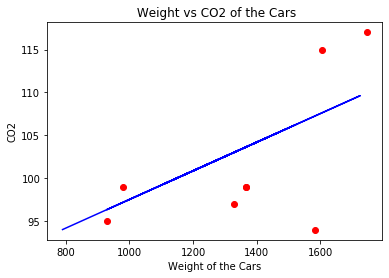

In [33]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_train, regressor.predict(X_train), color = "blue")
plt.title(" Weight vs CO2 of the Cars")
plt.xlabel("Weight of the Cars")
plt.ylabel("CO2")
plt.show()

In [34]:
print(regressor.predict([[929]]))

[96.34719097]


### Evaluate the Model Performance

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.34840444872270504

### Find the R_squared

In [36]:
regressor.fit(X_train, y_train)
# Find the R^2
print('The R-square is: ', regressor.score(X_train, y_train))

The R-square is:  0.283279710323483


### RMSE

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [38]:
RMSE = sqrt(mean_squared_error(y_test, y_pred))
RMSE

6.746855413080398